 # Practice Dimensionality Reduction and Classification
 ----
  
  University : UTEC \\
  Course       : Machine Learning \\
  Professor    : Cristian López Del Alamo \\
  Topic        : Dimensional Reduction \\
  Termina      :
   

 ----

Write the names and surnames of the members and the percentage of participation of each one in the development of the practice:
 - Integrante 1: (%)
 - Integrante 2: (%)
 - Integrante 3: (%)
 - Integrante 4: (%)


 ----


**Note: You may use previous codes from other exercises to read images from the database or to display images.**

  




In [1]:
# Lectura de datos y visualizacion
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import seaborn as sns

## Hand Image Classification

For this exercise, you have a set of pre-segmented hand images. These images represent the numbers from 1 to 9. The goal is to analyze the performance of your classification model with and without dimensionality reduction. For this exercise, you should try using PCA and SVD as dimensionality reduction methods and KNN and SVM as classifiers.

- Try to find the number of components necessary to avoid losing much information and minimize the size of the feature vector.
- Attempt to use different kernels and various numbers of neighbors for SVM and KNN, respectively.
Report the best results.

Database [HERE](https://drive.google.com/drive/folders/1uAaI6bDCMc22zteaHY9Nyp18bOQtIBV9?usp=drive_link)



In [4]:
# Load the data set here
# from google.colab import drive
# drive.mount('/content/drive/')
# "Rewrite the path in case your dataset is located in a different directory on your drive.
path = './'

## 1. Feature Vector

To generate the feature vector, your team should:

a. Read the images from the database in matrix form and flatten them. Thus, an image is a vector of dimension $n \times m$, where $n$ is the height and $m$ is the width of the image.    
b. Place all the vectors (images) in a matrix $X$, so that each column of the matrix is an image.    
c. Create a vector $Y$ that contains values from 0 to 9, which represent the labels of each image in the database.     

- An image: $I_i \in \mathbb{R}^{n \times m}$
- Image matrix: $X_{train} \in \mathbb{R}^{d \times c}$, where $d = n \times m$ and $c$ is the number of  pictures.
- Label vector: $Y_{train} \in \mathbb{R}^{c}$
- Repeat the same for the test folder

d. Randomize the matrices $X_{train}, Y_{train}$ and $X_{test}, Y_{test}$. Ensure that each image corresponds to its respective label.  

----

----


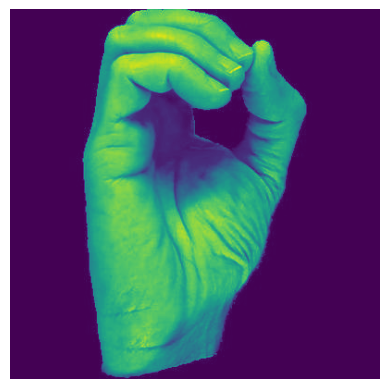

(400, 400)
(160000,)


In [6]:
import requests
from PIL import Image
import matplotlib.pyplot as plt

example = path + 'test/0/hand1_0_bot_seg_3_cropped.jpeg'
imagen = Image.open(example)
image_gray = imagen.convert('L')
plt.imshow(image_gray)
plt.axis('off')  # Oculta los ejes
plt.show()


#Image to vector

I  = np.array(image_gray)/ 255.0
print(I.shape)
vector = I.flatten()
print(vector.shape)

### Plot Image
Takes an image in vector form as input and displays it on the screen.

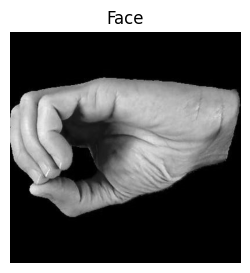

In [7]:
def Plot_Face(image_vec,m,n):
  fig1 = plt.figure(figsize=(10, 3))
  image = image_vec.reshape((m,n))
  img = plt.imshow(image.T)
  img.set_cmap('gray')
  plt.title("Face")
  plt.axis('off')
  plt.show()

# example
Plot_Face(vector,400,400)


# Creating Feature Vectors

In [9]:
# Complete your code here

# Creta te feacture vector from file image to vector
def Image_to_Vector(file_name):

  image = Image.open(file_name)
  image_gray = image.convert('L')
  I  = np.array(image_gray)/ 255.0
  vector = I.flatten()
  return vector

# Create the Matrix x using all the vector images

def Generated_Matrix(path_dataset_files):
  import os
  files = []
  for r, d, f in os.walk(path_dataset_files):
      for file in f:
          if '.jpeg' in file:
              files.append(os.path.join(r, file))
  X = []
  Y = []
  for file in files:
    #the files are in the next way: path_dataset_files/0/image.jpeg
    label = file.split('/')[-2]
    vector = Image_to_Vector(file)
    X.append(vector)
    Y.append(label)
  return np.array(X), np.array(Y)

X_train, y_train = Generated_Matrix(path + 'train/')
X_test, y_test = Generated_Matrix(path + 'test/')



## Dimensionality Reduction

In this stage, your team will use [SVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html) and [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to reduce the dimensionality of the data in your $X_{train}$ and $X_{test}$ matrices.

Plot the cumulative explained variance to determine the number of components in each case.


In [13]:
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA

# Write your code here

# Apply the Truncated SVD algorithm to reduce the dimensionality of the data
svd = TruncatedSVD(n_components=100)
X_train_new = svd.fit_transform(X_train)

# Apply the PCA algorithm to reduce the dimensionality of the data
pca = PCA(n_components=100)
X_train_new = pca.fit_transform(X_train)


# Save the data with dimensional reduction in a new variable X_train_new, Y_train_new , X_test_new, Y_test_new
X_test_new = pca.transform(X_test)
X_train_new = pca.transform(X_train)


# Classification

Use [SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) and [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) to classify and test your database.

- Perform timing tests and metrics without using dimensionality reduction.
- Perform timing tests and metrics using dimensionality reduction.
- Show the metrics report for the best results.
- Show the confusion matrix for the best results.

In [17]:
# Clasificadores
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

# Métricas de clasificacion
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Check the number of unique classes in y_train
num_classes = len(np.unique(y_train))

# Create the classifier
clf = svm.SVC()

# Only fit the classifier if there are more than one class
if num_classes > 1:
    clf.fit(X_train_new, y_train)
else:
    print("Error: The number of classes is less than or equal to one.")

# # Train the KNN classifier
# neigh = KNeighborsClassifier(n_neighbors=3)
# neigh.fit(X_train_new, y_train)

# # Predict the test data
# y_pred_svm = clf.predict(X_test_new)
# y_pred_knn = neigh.predict(X_test_new)

# # Print the classification report for SVM

# print(classification_report(y_test, y_pred_svm))

# # Print the classification report for KNN
# print(classification_report(y_test, y_pred_knn))







Error: The number of classes is less than or equal to one.
